In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import stopwords and stemmer
from nltk.corpus import stopwords
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
import string

In [4]:
# Set stopwords and load data
stopword = set(stopwords.words("english"))
df = pd.read_csv('twitter_data.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [10]:
# Define labels
df['labels']=df['class'].map({0: "hate speech detected", 1: "offensive language detected", 2: "no hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  no hate and offensive speech  
1   offensive language detected  
2   offensive language detected  
3   offensive language detected  
4   offensive language detected  


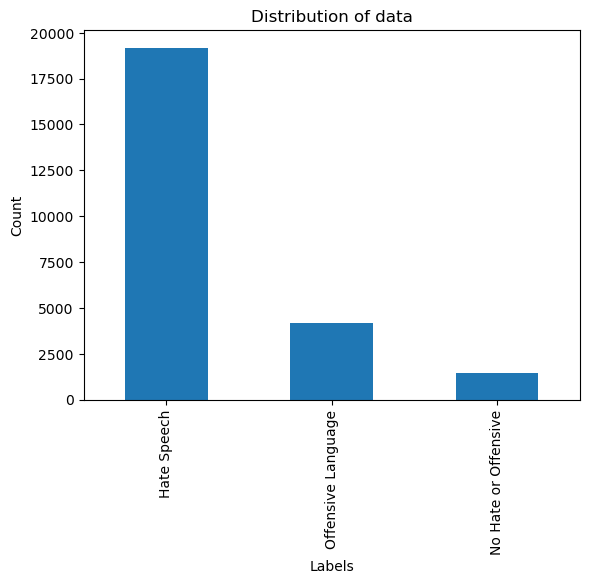

In [11]:
df['labels'].value_counts().plot(kind='bar', title='Distribution of data')
plt.xticks([0, 1, 2], ['Hate Speech', 'Offensive Language', 'No Hate or Offensive'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [16]:
def clean(text):
    text = re.sub('https?;//\S+|www\.\S+', '', text)  # url pattern
    text = re.sub('<.*?>+', '', text)  # special characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)  # new line pattern
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)

    return text

df["tweet"] = df["tweet"].apply(clean)

In [17]:
# Train-test split and vectorization
X = df["tweet"]
y = df["labels"]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and train a Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# Predict labels
y_pred = svm_classifier.predict(X_test)

In [23]:
# Evaluate the model
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

        hate speech detected       0.58      0.14      0.23       290
no hate and offensive speech       0.83      0.87      0.85       835
 offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.77      0.66      0.67      4957
                weighted avg       0.88      0.90      0.88      4957



In [21]:
# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  42   31  217]
 [   5  723  107]
 [  26  121 3685]]


In [33]:
test_data = "bloody idiot"
test_data_transformed = tfidf_vectorizer.transform([test_data])
predicted_label = svm_classifier.predict(test_data_transformed)[0]
predicted_label

'offensive language detected'

In [22]:

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.77%
